# Additional Work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from sklearn.linear_model import LinearRegression

In [2]:
critically_endangered = pd.read_csv("critically_endangered_filtered.csv")

critically_endangered = critically_endangered.dropna(axis="columns", how="all")
critically_endangered = critically_endangered.dropna(axis="rows", how="all")
critically_endangered = critically_endangered.drop_duplicates(subset='speciesName', keep='first')

### Possibly Extinct Means and Standard Deviation

In [3]:
# assign bool True to int 1 and bool False to int 0 for the possiblyExtinct and possibly ExtinctInTheWild columns
possiblyExtinct_values = (critically_endangered['possiblyExtinct'] == True).astype(int)
possiblyExtinctInTheWild_values = (critically_endangered['possiblyExtinctInTheWild'] == True).astype(int)

# retrieve the mean of the int values for the possiblyExtinct and possibly ExtinctInTheWild columns
possiblyExtinct_mean = possiblyExtinct_values.mean()
possiblyExtinctInTheWild_mean = possiblyExtinctInTheWild_values.mean()

# retrieve the standard deviation of the values for the possiblyExtinct and possibly ExtinctInTheWild columns
possiblyExtinct_std = np.sqrt(np.var(possiblyExtinct_values))
possiblyExtinctInTheWild_std = np.sqrt(np.var(possiblyExtinctInTheWild_values))

print("Possibly Extinct Mean:", possiblyExtinct_mean)
print("Possibly Extinct In The Wild Mean:", possiblyExtinctInTheWild_mean)
print("Possibly Extinct Standard Deviation:", possiblyExtinct_std)
print("Possibly Extinct In The Wild Standard Deviation:", possiblyExtinctInTheWild_std)

Possibly Extinct Mean: 0.20437956204379562
Possibly Extinct In The Wild Mean: 0.00291970802919708
Possibly Extinct Standard Deviation: 0.4032475129031555
Possibly Extinct In The Wild Standard Deviation: 0.053955382810441654


### Red List Indicator Variables

In [4]:
def redlistcrit_helper():
    # retrieve value counts for redlistCriteria columns
    critically_endangered.groupby('redlistCriteria')['redlistCriteria'].count()

    coder={'False':0,'True':1}

    # retrieve species with A2 criteria
    regex = "A"
    A = critically_endangered['redlistCriteria'].str.contains(regex)
    A=A.astype(int)

    # retrieve species with A3 criteria
    regex = "B"
    B = critically_endangered['redlistCriteria'].str.contains(regex)
    B=B.astype(int)

    # retrieve species with C1 criteria
    regex = "C"
    C = critically_endangered['redlistCriteria'].str.contains(regex)
    C=C.astype(int)

    # retrieve species with C2B criteria
    regex = "D"
    D = critically_endangered['redlistCriteria'].str.contains(regex)
    D=D.astype(int)

    # retrieve species with E criteria
    regex = "E"
    E = critically_endangered['redlistCriteria'].str.contains(regex)
    E=E.astype(int)

    # create dictionary with criteria matched to number of species with given criteria for indicator variables
    indicator_redlistCrit = { 'A': A, 'B': B, 'C': C, 'D': D, 'E':E } 

    return indicator_redlistCrit

In [5]:
# display indicator variables tables
redlistCriteria_dummies = pd.DataFrame(redlistcrit_helper()) 
redlistCriteria_dummies.head()

,A,B,C,D,E
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


### Criteria Distribution

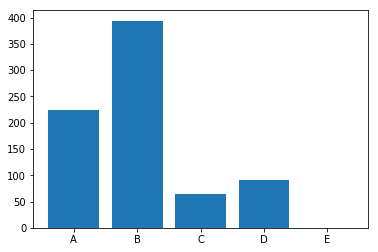

In [6]:
A_sum=0
B_sum=0
C_sum=0
D_sum=0
E_sum=0

for crit in critically_endangered['redlistCriteria']:
    if 'A' in crit:
        A_sum+=1
    if 'B' in crit:
        B_sum+=1
    if 'C' in crit:
        C_sum+=1
    if 'D' in crit:
        D_sum+=1
    if 'E' in crit:
        E_sum+=1

categories=['A','B','C','D','E']
sums=[A_sum,B_sum,C_sum,D_sum,E_sum]

plt.bar(categories,sums)
plt.show()

### Redlist Criteria Linear Regression

In [7]:
# create a linear regression model for redlist criteria
A = redlistCriteria_dummies[['A']]
A_model = LinearRegression().fit(A, possiblyExtinct_values)
A_slope = A_model.coef_
print("A Slope:", float(A_slope))

B = redlistCriteria_dummies[['B']]
B_model = LinearRegression().fit(B, possiblyExtinct_values)
B_slope = B_model.coef_
print("B Slope:", float(B_slope))

C = redlistCriteria_dummies[['C']]
C_model = LinearRegression().fit(C, possiblyExtinct_values)
C_slope = C_model.coef_
print("C Slope:", float(C_slope))

D = redlistCriteria_dummies[['D']]
D_model = LinearRegression().fit(D, possiblyExtinct_values)
D_slope = D_model.coef_
print("D Slope:", float(D_slope))

E = redlistCriteria_dummies[['E']]
E_model = LinearRegression().fit(E, possiblyExtinct_values)
E_slope = E_model.coef_
print("E Slope:", float(E_slope))

A Slope: -0.20418538890610494
B Slope: -0.02106337327960645
C Slope: -0.12203099838969403
D Slope: 0.5500055500055498
E Slope: 0.0


### Region Indicator Variables

In [8]:
# create indicator variable table for region
region_dummies = pd.get_dummies(critically_endangered['Region'])
region_dummies.head()

,North Africa,North America,North Asia,South America
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


### Systems Indicator Variables

In [9]:
# create indicator variable table for systems
systems_dummies = pd.get_dummies(critically_endangered['systems'])
systems_dummies.head()

,Freshwater (=Inland waters),Freshwater (=Inland waters)|Marine,Marine,Terrestrial,Terrestrial|Freshwater (=Inland waters),Terrestrial|Freshwater (=Inland waters)|Marine,Terrestrial|Marine
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0


### Filtering By Keywords

In [10]:
# replace NaN values with string in order to use str.contains function
keyword_critically_endangered = critically_endangered.fillna("NaN")

# determine which keywords are most common for each column
Counter(" ".join(keyword_critically_endangered['range']).split()).most_common(200)
Counter(" ".join(keyword_critically_endangered['rationale']).split()).most_common(200)
Counter(" ".join(keyword_critically_endangered['habitat']).split()).most_common(200)
Counter(" ".join(keyword_critically_endangered['population']).split()).most_common(200)
Counter(" ".join(keyword_critically_endangered['conservationActions']).split()).most_common(200)

# filter for keywords in range column
Range = keyword_critically_endangered['range']
range_water = keyword_critically_endangered[Range.str.contains("water")]
range_tropical = keyword_critically_endangered[Range.str.contains("tropical")]
range_river = keyword_critically_endangered[Range.str.contains("river")]

# filter for keywords in rationale column
rationale = keyword_critically_endangered['rationale']
rationale_water = keyword_critically_endangered[rationale.str.contains("water")]
rationale_climate_change = keyword_critically_endangered[rationale.str.contains("climate change")]
rationale_exploit = keyword_critically_endangered[rationale.str.contains("exploit")]
rationale_poach = keyword_critically_endangered[rationale.str.contains("poach")]
rationale_fishing = keyword_critically_endangered[rationale.str.contains("fishing")]

# filter for keywords in habitat column
habitat = keyword_critically_endangered['habitat']
habitat_water = keyword_critically_endangered[habitat.str.contains("water")]
habitat_tropical = keyword_critically_endangered[habitat.str.contains("tropical")]
habitat_stream = keyword_critically_endangered[habitat.str.contains("stream")]
habitat_hot = keyword_critically_endangered[habitat.str.contains("hot")]
habitat_warm = keyword_critically_endangered[habitat.str.contains("warm")]
habitat_cold = keyword_critically_endangered[habitat.str.contains("cold")]
habitat_vegetation = keyword_critically_endangered[habitat.str.contains("vegetation")]
habitat_migration = keyword_critically_endangered[habitat.str.contains("migration")]

# filter for keywords in population column
population = keyword_critically_endangered['population']
population_fishing = keyword_critically_endangered[population.str.contains("fishing")]
population_sea = keyword_critically_endangered[population.str.contains("sea")]

# filter for keywords in conservationActions column
conservation = keyword_critically_endangered['conservationActions']
conservation_protected = keyword_critically_endangered[population.str.contains("protected")]
conservation_banned = keyword_critically_endangered[population.str.contains("banned")]
conservation_commision = keyword_critically_endangered[population.str.contains("commission")]
conservation_trade = keyword_critically_endangered[population.str.contains("trade")]

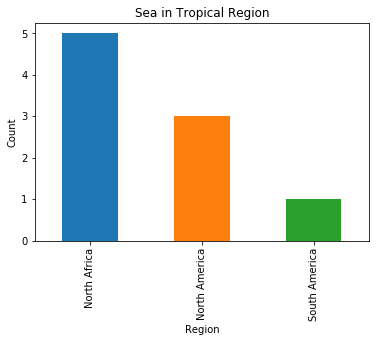

In [11]:
# plot a bar graph to show frequency of sea for each Region
range_tropical['Region'].value_counts().plot(kind='bar')
plt.title("Sea in Tropical Region")
plt.ylabel("Count")
plt.xlabel("Region")
plt.show()

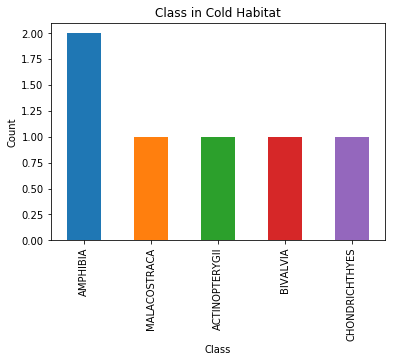

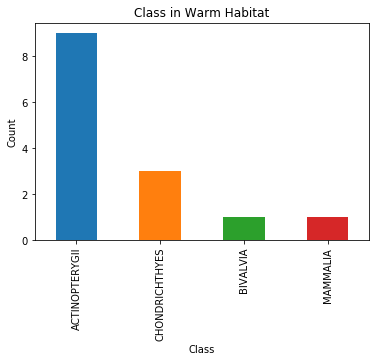

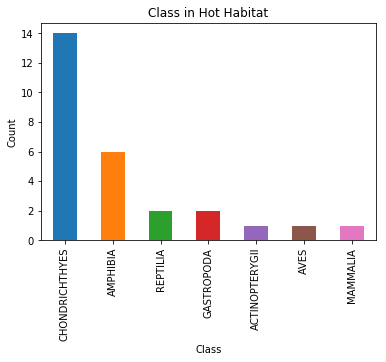

In [12]:
# plot a bar graph to show frequency of sea for each region
habitat_cold['className'].value_counts().plot(kind='bar')
plt.title("Class in Cold Habitat")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

habitat_warm['className'].value_counts().plot(kind='bar')
plt.title("Class in Warm Habitat")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

habitat_hot['className'].value_counts().plot(kind='bar')
plt.title("Class in Hot Habitat")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

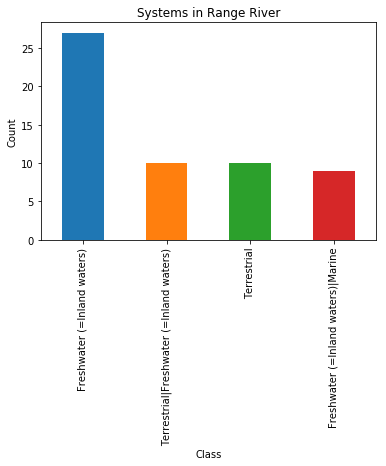

In [13]:
# plot a bar graph to show frequency systems in Range river
range_river['systems'].value_counts().plot(kind='bar')
plt.title("Systems in Range River")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

### Categorizing by Phylum

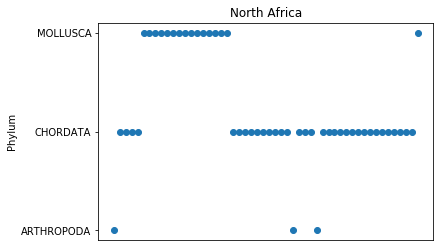

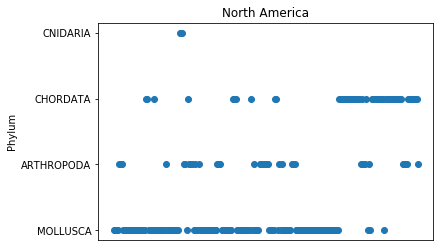

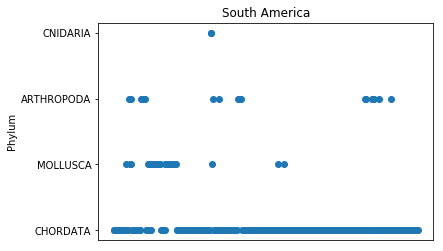

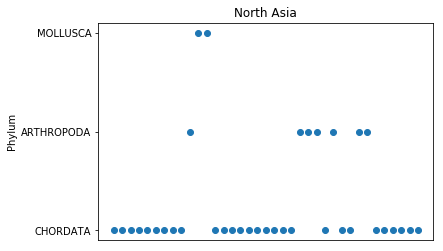

In [14]:
def phylum_scatter(region):
    NAMdf = critically_endangered[critically_endangered['Region']==region]

    x_vals=NAMdf['speciesName']
    plt.gca().axes.get_xaxis().set_visible(False)
    y_vals=NAMdf['phylumName']
    plt.scatter(x_vals,y_vals)
    plt.title(region)
    plt.xlabel("Species")
    plt.ylabel("Phylum")
    plt.show()

phylum_scatter('North Africa')
phylum_scatter('North America')
phylum_scatter('South America')
phylum_scatter('North Asia')

### Region vs Redlist Criteria Linear Regression

In [15]:
# can region be used to predict Redlist Criteria?

# define function for linear regression
def critregionplot(region):
    tempdf=critically_endangered
    tempdf[region]=region_dummies[region]
    
    count = tempdf[tempdf[region]==1]

    A=0
    B=0
    C=0
    D=0
    E=0
    
    # loop through criteria to accumulate region count
    for criteria in count['redlistCriteria']:
        if 'A' in criteria:
            A+=1
        if 'B' in criteria:
            B+=1
        if 'C' in criteria:
            C+=1
        if 'D' in criteria:
            D+=1
        if 'E' in criteria:
            E+=1
    
    A_percentage = A/len(count['redlistCriteria'])
    B_percentage = B/len(count['redlistCriteria'])
    C_percentage = C/len(count['redlistCriteria'])
    D_percentage = D/len(count['redlistCriteria'])
    E_percentage = E/len(count['redlistCriteria'])
    
    criteria_mean=[redlistCriteria_dummies['A'].mean(), redlistCriteria_dummies['B'].mean(), redlistCriteria_dummies['C'].mean(), redlistCriteria_dummies['D'].mean(), redlistCriteria_dummies['E'].mean()]
    
    criteria_percentage=[A_percentage, B_percentage, C_percentage, D_percentage, E_percentage]

    criteria_df = pd.DataFrame({'criteria_mean': criteria_mean, 'criteria_percentage': criteria_percentage})
    criteria_model = LinearRegression().fit(criteria_df[['criteria_mean']], criteria_df[['criteria_percentage']])
    
    plt.scatter(criteria_mean, criteria_percentage)
    plt.title(region)
    plt.xlabel("Criteria Mean")
    plt.ylabel("Criteria Percentage")
    plt.xlim(0,.5)
    plt.ylim(0,.75)
    plt.show()
    
    slope = criteria_model.coef_
    intercept = criteria_model.intercept_
    r_squared_score = criteria_model.score(criteria_df[['criteria_mean']], criteria_df[['criteria_percentage']])
    print("Slope:", float(slope))
    print("Intercept:", float(intercept))
    print("R Squared Score:", float(r_squared_score))

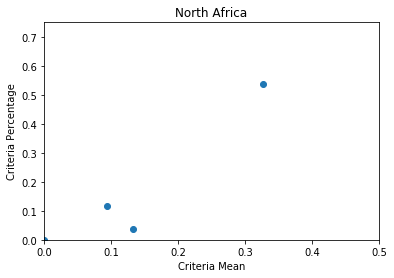

Slope: 0.8764609273546711
Intercept: 0.025265449545489288
R Squared Score: 0.684950935391804


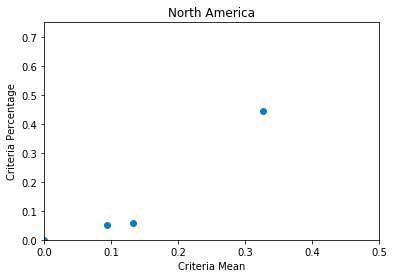

Slope: 1.174885619807087
Intercept: -0.03213644322798026
R Squared Score: 0.948614602893394


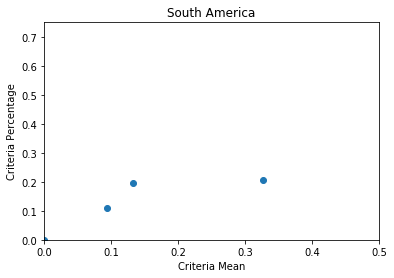

Slope: 0.9404609123075759
Intercept: 0.009966372524775169
R Squared Score: 0.9090167257968316


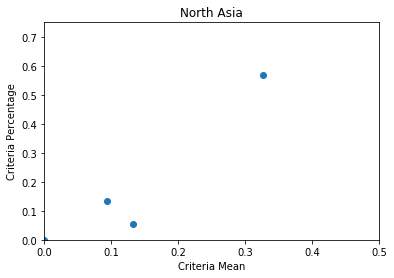

Slope: 0.7514795083067177
Intercept: 0.052017633323492296
R Squared Score: 0.5347859730892996


In [16]:
# plot scatter plots
critregionplot('North Africa')
critregionplot('North America')
critregionplot('South America')
critregionplot('North Asia')

### Region Counts Bar Graph

In [17]:
def bargraph(region):
    tempdf=critically_endangered
    tempdf[region]=region_dummies[region]
    
    count = tempdf[tempdf[region]==1]

    A=0
    B=0
    C=0
    D=0
    E=0
    
    # loop through criteria to accumulate region count
    for criteria in count['redlistCriteria']:
        if 'A' in criteria:
            A+=1
        if 'B' in criteria:
            B+=1
        if 'C' in criteria:
            C+=1
        if 'D' in criteria:
            D+=1
        if 'E' in criteria:
            E+=1
    
    A_percentage = A/len(count['redlistCriteria'])
    B_percentage = B/len(count['redlistCriteria'])
    C_percentage = C/len(count['redlistCriteria'])
    D_percentage = D/len(count['redlistCriteria'])
    E_percentage = E/len(count['redlistCriteria'])
    
    plt.title(region)
    plt.bar(['A','B','C','D', 'E'],[A_percentage, B_percentage, C_percentage, D_percentage, E_percentage])
    plt.xlabel("RedList Criteria")
    plt.ylabel("Percentage")
    plt.show()

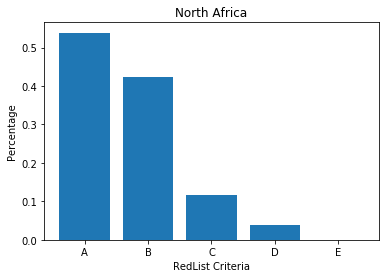

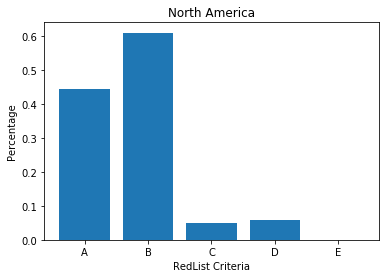

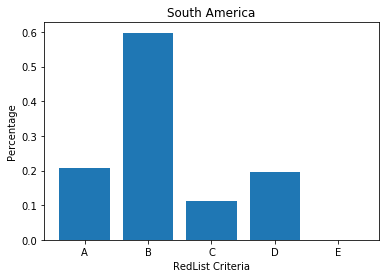

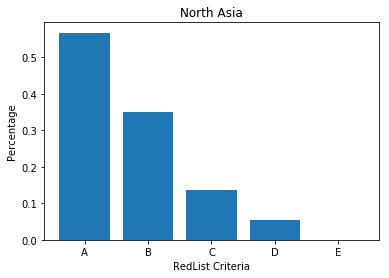

In [18]:
bargraph('North Africa')
bargraph('North America')
bargraph('South America')
bargraph('North Asia')

### Redlist Criteria vs System Bar Graphs

In [19]:
# define function for linear regression
def critsystemplot(criteria):
    tempdf=critically_endangered
    tempdf[criteria]=redlistCriteria_dummies[criteria]

    A2count = tempdf[tempdf[criteria]==1]

    T=0
    M=0
    FIW=0
    TM=0
    FIWM=0
    TFIW=0
    TFIWM=0

    # loop through criteria to accumulate systems count
    for i in range(A2count['systems'].count()):
        system = (A2count.iloc[i]['systems'])
        if (system=='Terrestrial'):
            T+=1
        if (system=='Marine'):
            M+=1
        if (system=='Freshwater (=Inland waters)'):
            FIW+=1
        if (system=='Terrestrial|Marine'):
            TM+=1
        if (system=='Freshwater (=Inland waters)|Marine'):
            FIWM+=1
        if (system=='Terrestrial|Freshwater (=Inland waters)'):
            TFIW+=1
        if (system=='Terrestrial|Freshwater (=Inland waters)|Marine'):
            TFIWM+=1
    plt.title(criteria)
    plt.bar(['Terrestrial','Marine','Freshwater (=Inland waters)','Terrestrial|Marine','Freshwater (=Inland waters)|Marine','Terrestrial|Freshwater (=Inland waters)','Terrestrial|Freshwater (=Inland waters)|Marine'],[T,M,FIW,TM,FIWM,TFIW,TFIWM])
    plt.show()

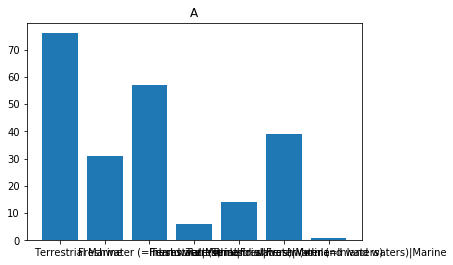

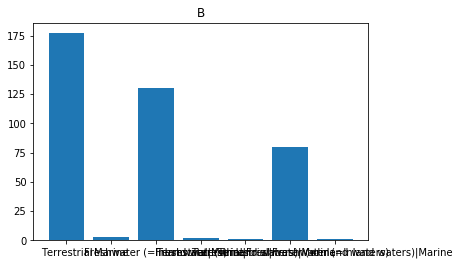

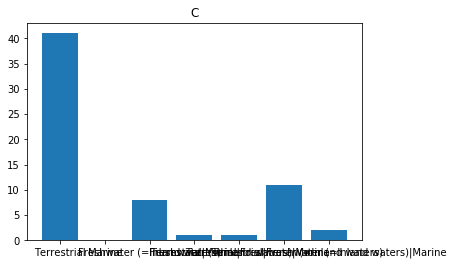

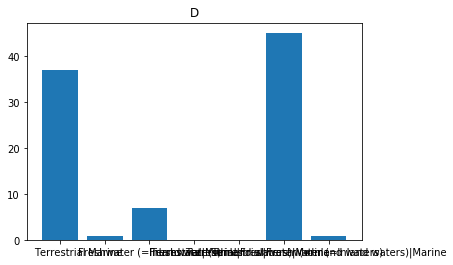

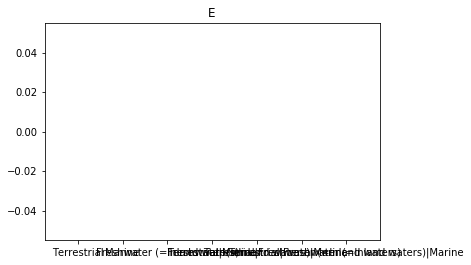

In [20]:
# plot bar graphs
critsystemplot('A')
critsystemplot('B')
critsystemplot('C')
critsystemplot('D')
critsystemplot('E')

### Region vs Redlist Criteria Evaluation of Significance

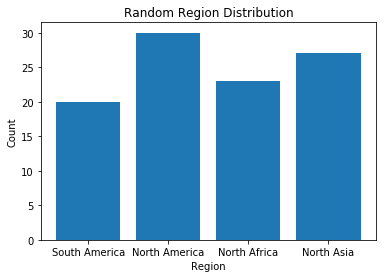

In [21]:
# generate a list of numbers that represent different regions for a given random criteria
random_region = np.random.rand(100)

# create accumulator variables
south_america_count=0
north_america_count=0
north_africa_count=0
north_asia_count=0
    
# loop through criteria to accumulate region count
for x in random_region:
    if (x < 0.25):
        south_america_count+=1
    if (x > 0.25 and x < 0.5):
        north_america_count+=1
    if (x > 0.5 and x < 0.75):
        north_africa_count+=1
    if (x > 0.75):
        north_asia_count+=1

# plot bar graph
plt.title("Random Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.bar(['South America','North America','North Africa','North Asia'],[south_america_count, north_america_count, north_africa_count, north_asia_count])
plt.show()